<a href="https://colab.research.google.com/github/Anton717/coursera-test/blob/master/2_4_Iris_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
iris_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [3]:
iris_train.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [4]:
X_train = iris_train.drop(columns = ['Unnamed: 0', 'species'])
X_train.head()

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5


In [5]:
y_train = iris_train.species
y_train.head()

0    2
1    0
2    0
3    2
4    2
Name: species, dtype: int64

In [6]:
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')
iris_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [7]:
iris_test.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [8]:
X_test = iris_test.drop(columns = ['Unnamed: 0', 'species'])
X_test.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [9]:
y_test = iris_test.species
y_test.head()

0    2
1    1
2    2
3    1
4    0
Name: species, dtype: int64

In [0]:
depth_values = range(1,100)
scores = pd.DataFrame()

In [0]:
for depth in depth_values:
    clf = tree.DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_scores = pd.DataFrame({'max_depth': [depth], 'train_score': [train_score], 'test_score': [test_score]})
    scores = scores.append(temp_scores)

In [12]:
scores.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.94


In [0]:
scores_long = pd.melt(scores, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='type', value_name='score')

In [14]:
scores_long.head()

,max_depth,type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


In [0]:
import seaborn as sns

In [16]:
sns.__version__

'0.9.0'

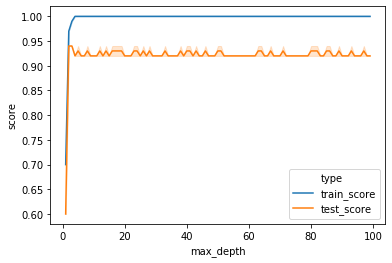

In [20]:
sns.lineplot(x = "max_depth", y = "score", hue = "type", data = scores_long)